In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import datetime
from time import strptime

In [66]:
vol3 = pd.read_csv('volvolvol.csv')
dffr = pd.read_csv('DFF.csv')
temp = []
temp2 = []
temp3 = []
vol3t = pd.DataFrame()
vol3t['DATE'] = vol3.iloc[:,4]
vol3t['WALCL'] = vol3.iloc[:,5]
vol3t = vol3t.dropna()


for i in range(len(dffr)):
    temp.append(datetime.date(int(dffr.iloc[i,0][0:4]),int(dffr.iloc[i,0][5:7]),int(dffr.iloc[i,0][8:])))
for i in range(len(vol3)):
    split = vol3.iloc[i,0].split('/')
    temp2.append(datetime.date(2000+int(split[2]),int(split[0]),int(split[1])))
for i in range(len(vol3t)):
    split = vol3t.iloc[i,0].split('/')
    temp3.append(datetime.date(2000+int(split[2]),int(split[0]),int(split[1])))
    

tempdf = pd.DataFrame()
tempdf2 = pd.DataFrame()
tempdf3 = pd.DataFrame()
tempdf['Datetime'] = temp2
tempdf2['Datetime'] = temp
tempdf3['Datetime'] = temp3
tempdf['iPCA'] = vol3['iPCA']
tempdf2['DFF'] = dffr['DFF']
tempdf3['WALCL'] = vol3['WALCL']

df = pd.merge(tempdf,tempdf2,on='Datetime')
df = pd.merge(df,tempdf3,on='Datetime')
df.dropna()
df.head()

,Datetime,iPCA,DFF,WALCL
0,2018-01-10,0.917723,1.42,4446062.0
1,2018-01-17,0.910858,1.42,4439145.0
2,2018-01-24,0.909313,1.42,4441317.0
3,2018-01-31,0.913663,1.34,4419225.0
4,2018-02-07,0.906349,1.42,4420745.0


       Datetime      iPCA   DFF      WALCL     riPCA      rFFR       rBS
0    2018-01-10  0.917723  1.42  4446062.0       NaN       NaN       NaN
1    2018-01-17  0.910858  1.42  4439145.0       NaN       NaN       NaN
2    2018-01-24  0.909313  1.42  4441317.0       NaN       NaN       NaN
3    2018-01-31  0.913663  1.34  4419225.0       NaN       NaN       NaN
4    2018-02-07  0.906349  1.42  4420745.0  0.931521  3.084046  1.918984
..          ...       ...   ...        ...       ...       ...       ...
251  2022-12-07  0.858350  3.83  8582735.0  0.935269  3.676167  1.349364
252  2022-12-14  0.853059  3.83  8583413.0  0.935492  3.643739  1.347439
253  2022-12-21  0.849279  4.33  8564411.0  0.935729  3.606204  1.345551
254  2022-12-28  0.848330  4.33  8551169.0  0.935968  3.569720  1.343693
255  2023-01-04  0.849157  4.33  8507429.0  0.936203  3.534243  1.341892

[256 rows x 7 columns]


Text(0.5, 1.0, 'Relation Between Balance Sheet Changes \n and Volativity of % Variation Explained by PC1')

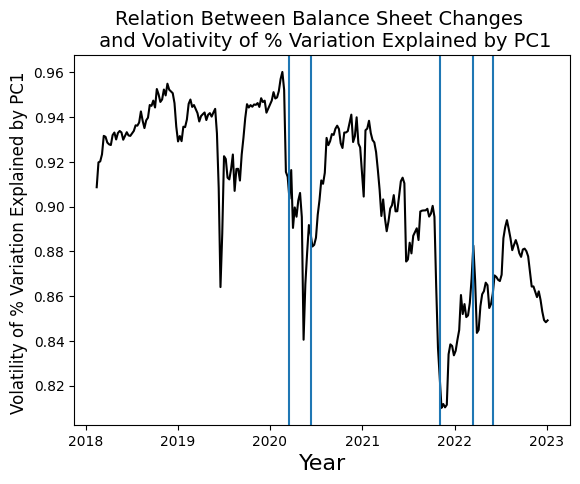

In [117]:
dates = []
rollingiPCA = []
rollingFFR = []
rollingBS = []
lag = 5

for n in range(len(df)):
    rollingiPCA = df.iloc[n,1]/df['iPCA'].expanding(lag).mean()
    rollingFFR = df.iloc[n,2]/df['DFF'].expanding(lag).mean()
    rollingBS = df.iloc[n,3]/(df['WALCL'].expanding(lag).mean())

df['riPCA'] = rollingiPCA
df['rFFR'] = rollingFFR
df['rBS'] = rollingBS

voliPCA = []
volFFR = []
volBS = []

print(df)
for n in range(len(df)-lag):
    voliPCA.append(np.var(df.iloc[:,4][n:(n+lag)]))
    volFFR.append(np.var(df.iloc[:,5][n:(n+lag)]))
    volBS.append(np.var(df.iloc[:,6][n:(n+lag)]))
    dates.append(df.iloc[:,0][n+lag])

dates = np.array(dates)
voliPCA = np.array(voliPCA)
volFFR = np.array(volFFR)
volBS = np.array(volBS)
BS = np.array(df.iloc[lag:,3])

fig, ax = plt.subplots()
ax.plot(dates, df['iPCA'][lag:], color = 'black')
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Volatility of % Variation Explained by PC1 ', color='black', fontsize=12)
ax.axvline(datetime.date(2020,3,15))
ax.axvline(datetime.date(2020,6,11))
ax.axvline(datetime.date(2021,11,3))
ax.axvline(datetime.date(2022,3,15))
ax.axvline(datetime.date(2022,6,1))
ax.set_title('Relation Between Balance Sheet Changes \n and Volativity of % Variation Explained by PC1', fontsize=14)
#ax2 = ax.twinx()
#ax2.plot(dates, BS, color = 'blue')
#ax2.set_ylabel('Fed Balance Sheet ', color='blue', fontsize=16)

#plt.plot(dates,voliPCA, color = 'black')
#plt.plot(dates,volFFR, color = 'red')
#plt.plot(dates,volBS, color = 'blue')

Text(0, 0.5, 'Volatility of Federal Funds Rate ')

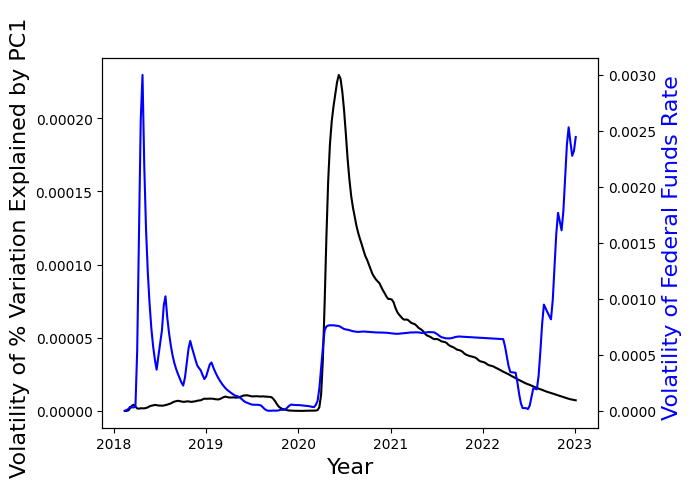

In [87]:
fig, ax = plt.subplots()
ax.plot(dates, volBS, color = 'black')
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Volatility of % Variation Explained by PC1 ', color='black', fontsize=16)
ax2 = ax.twinx()
ax2.plot(dates, volFFR, color = 'blue')
ax2.set_ylabel('Volatility of Federal Funds Rate ', color='blue', fontsize=16)

Text(0, 0.5, 'Volatility of Fed Balance Sheet ')

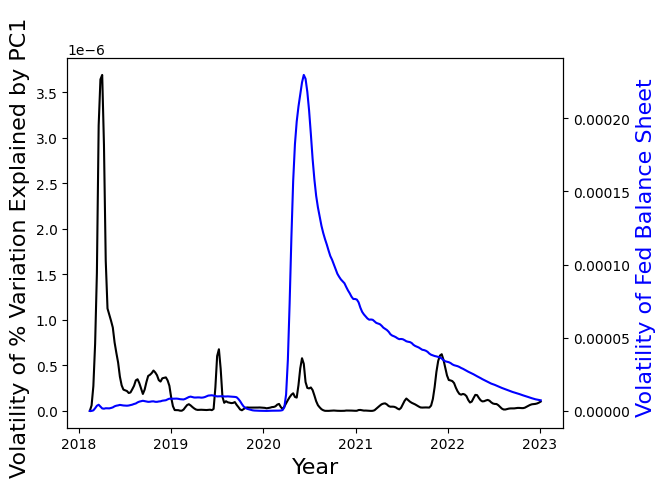

In [89]:
fig, ax = plt.subplots()
ax.plot(dates, voliPCA, color = 'black')
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Volatility of % Variation Explained by PC1 ', color='black', fontsize=16)
ax2 = ax.twinx()
ax2.plot(dates, volBS, color = 'blue')
ax2.set_ylabel('Volatility of Fed Balance Sheet ', color='blue', fontsize=16)